In [1]:
import sklearn.datasets as datasets
import pandas as pd
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import matplotlib.pyplot as plt

original_df=pd.read_csv('../data/zoo-animal-classification/zoo.csv', index_col=False)
class_names_df = pd.read_csv('../data/zoo-animal-classification/class.csv', index_col=False)
class_only = class_names_df[['Class_Number', 'Class_Type']]
class_only = class_only.rename(columns={'Class_Number': 'class_type', "Class_Type": "class_name"})
df = pd.merge(original_df, class_only, on='class_type', how='outer')
y=df['class_name']

df_class = df.copy()
del df['animal_name']
del df['class_name']
del df['class_type']

for col in df.columns:
    items = list(df[col].unique())
    items.sort()
    if items==[0,1]:
        df[col]=df[col].astype(bool)

In [2]:
df_bool = df.copy()
df_bool

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0
7,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
8,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
9,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1


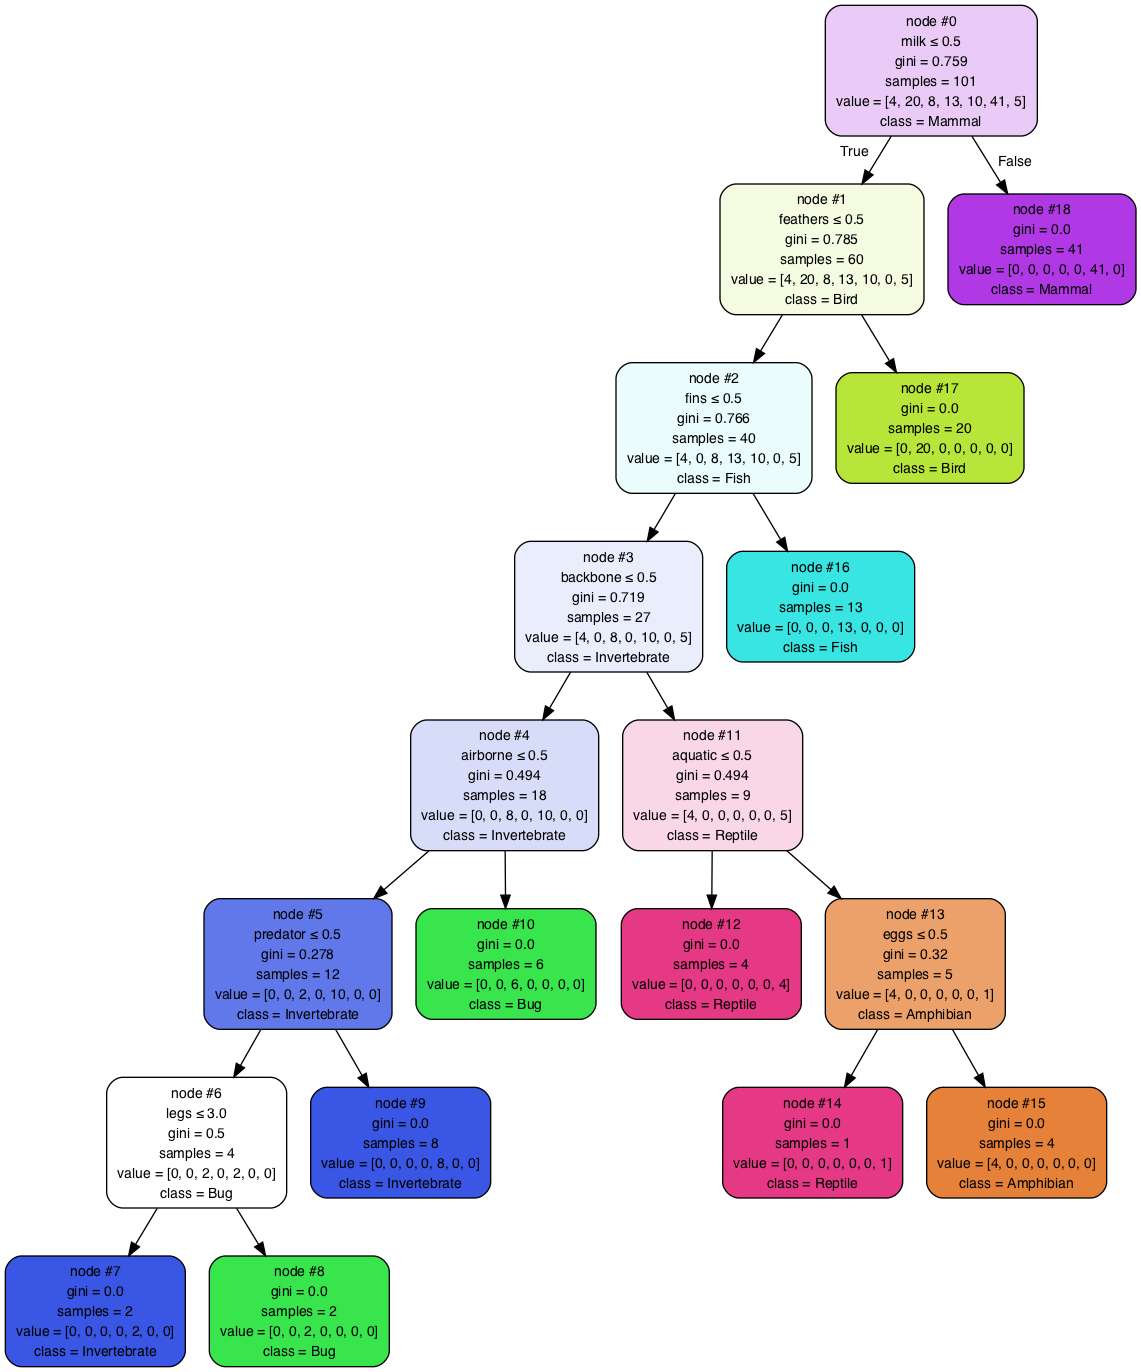

In [3]:
dtree=DecisionTreeClassifier()
dtree.fit(df_bool,y)
dot_data = StringIO()
class_names=list(class_only['class_name'].unique())
class_names.sort()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, proportion=False, feature_names = df.columns, node_ids=True, class_names=class_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())




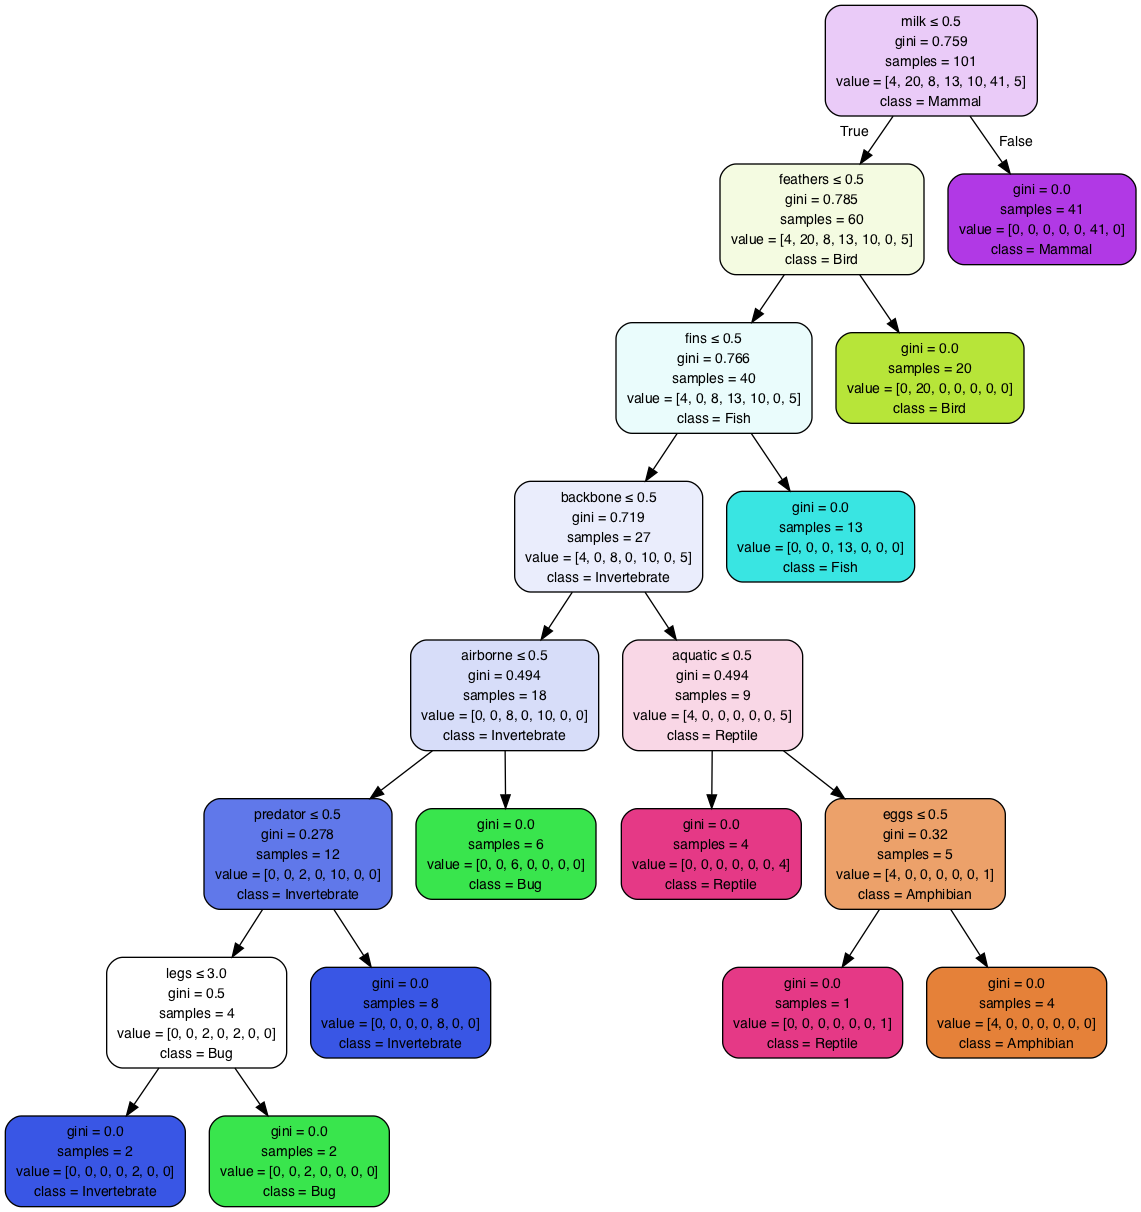

In [4]:
dtree=DecisionTreeClassifier()
dtree.fit(df_bool,y)
dot_data = StringIO()
class_names=list(class_only['class_name'].unique())
class_names.sort()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, proportion=False, feature_names = df.columns, node_ids=False, class_names=class_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [5]:
class_names = list(class_only['class_name'])

In [6]:
class_names.sort()
class_names

['Amphibian', 'Bird', 'Bug', 'Fish', 'Invertebrate', 'Mammal', 'Reptile']

In [7]:
del df_class['animal_name']

In [8]:
class_names

['Amphibian', 'Bird', 'Bug', 'Fish', 'Invertebrate', 'Mammal', 'Reptile']

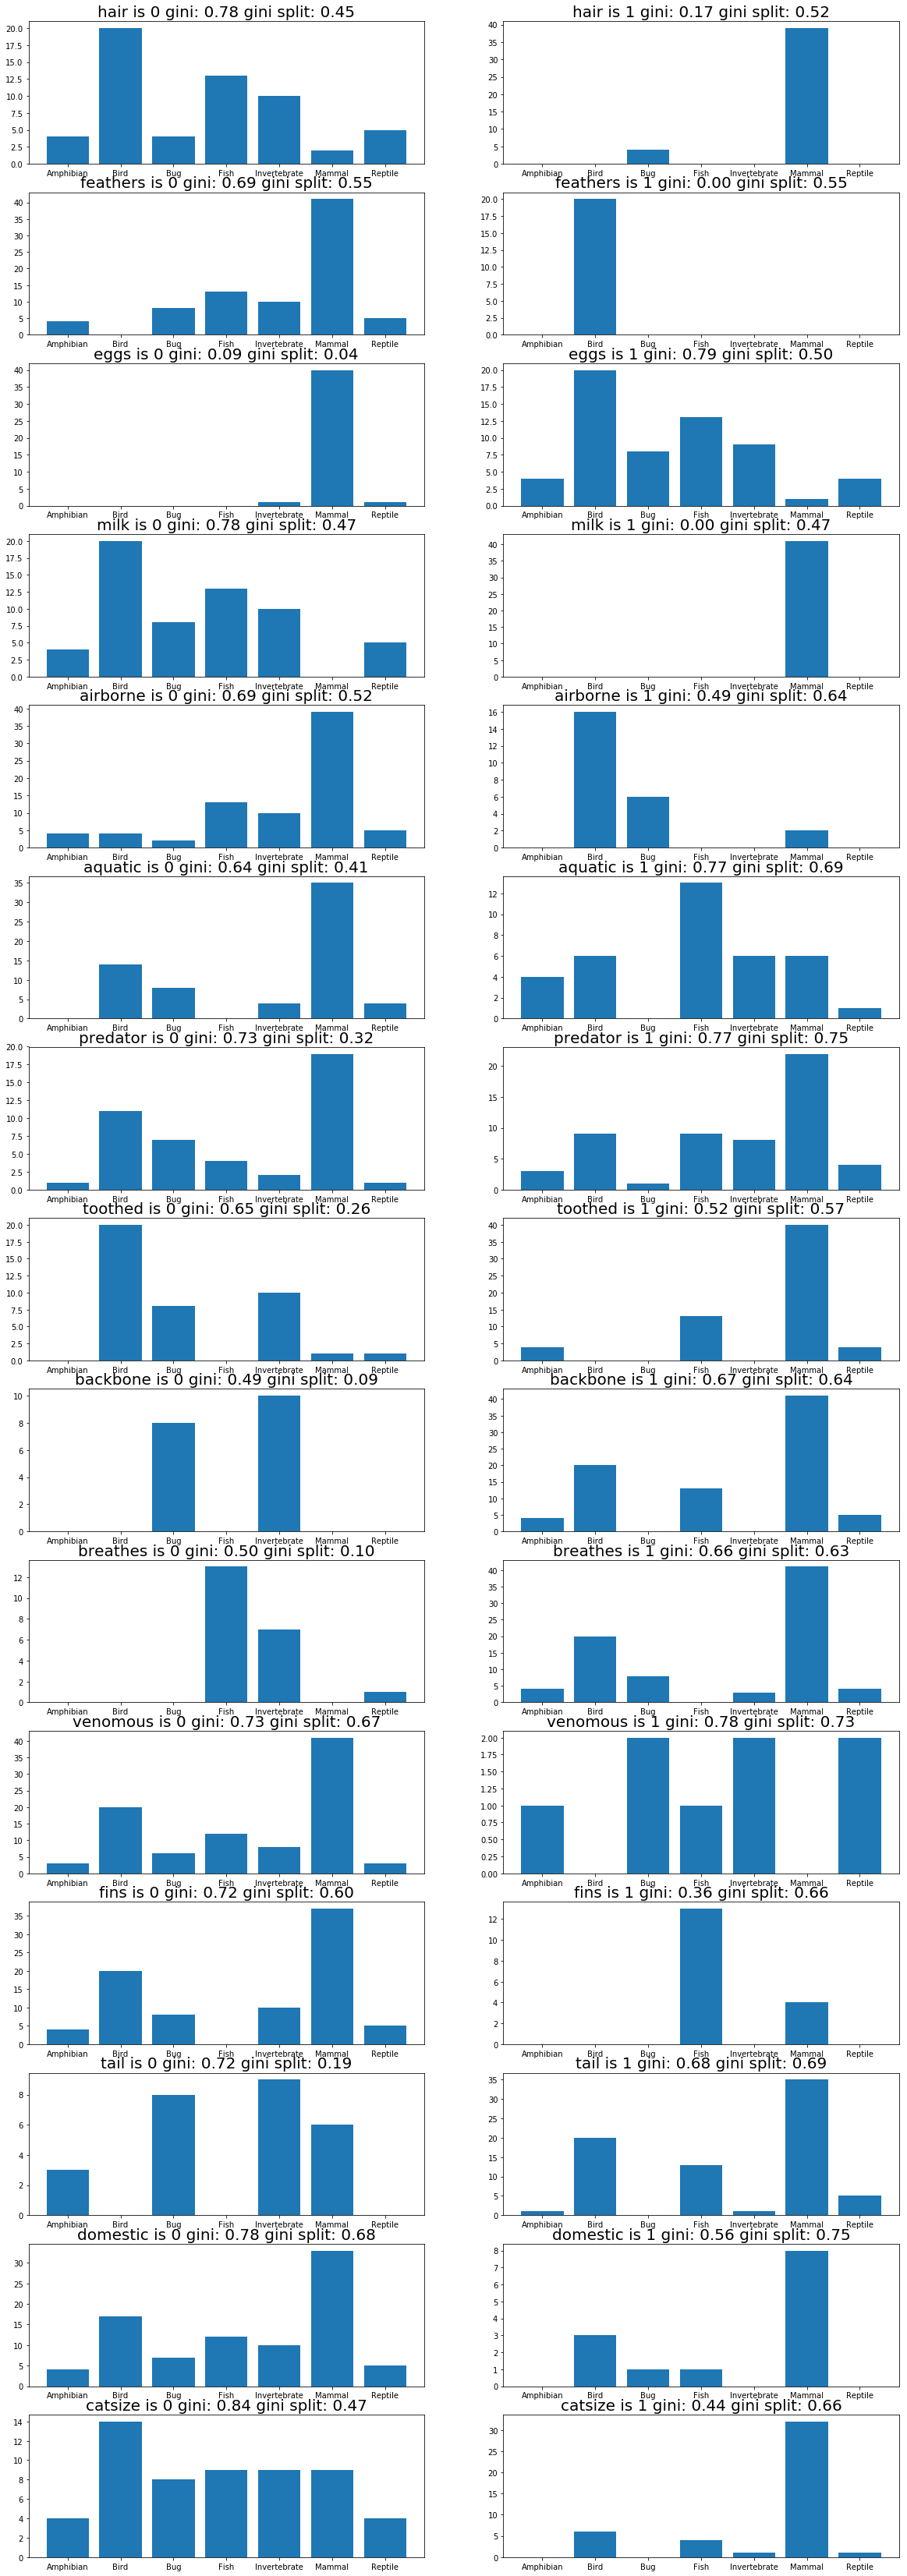

In [9]:
import matplotlib.pyplot as plt

def make_attribute_view(df_class, filename):
    gini_df = pd.DataFrame()
    oFig1 = plt.figure(1, figsize=(20,80))
       #(m,n,x) -> x starts with 1
    ...
    # iterating through every column in datafarme
    plot_index = 1
    
    for temp_class_name in df_class.columns:
        unique_col_values =list(df_class[temp_class_name].unique())
        unique_col_values.sort()

        if unique_col_values==[0,1]:
            # for a given column; plot distribution for every possible value

            gini_split=0
            num_at_record = df_class.shape[0]
            for i in range(0, len(unique_col_values)):
                unique_col_value = unique_col_values[i]
                temp_df = df_class[df_class[temp_class_name]==unique_col_value]
                values = []
                gini_score = 1.0
                num_at_child = float(temp_df.shape[0])
                for class_name in class_names:
                    count = temp_df[temp_df['class_name']==class_name].shape[0]
                    gini_score -= (float(count)/num_at_child)**2
                    values.append(count)
                    
                gini_split+=gini_score*(num_at_child/num_at_record)
                new = oFig1.add_subplot(20,2, plot_index)   
                new.bar(class_names, values)
                new.set_title(temp_class_name + " is " + str(unique_col_value) + " gini: " + f'{gini_score:.2f}' + " gini split: " + f'{gini_split:.2f}', fontsize=20)
                plot_index+=1
                temp_row = {'column_name': temp_class_name, 'column_value': unique_col_value, 'gini_score': gini_score, 'num_at_child': num_at_child, 'num_at_record': num_at_record, 'distribution': values }
                gini_df = gini_df.append(temp_row, ignore_index=True)
    plt.show()

    return gini_df
gini_df = make_attribute_view(df_class, 'milk')

In [10]:
gini_df

,column_name,column_value,distribution,gini_score,num_at_child,num_at_record
0,hair,0.0,"[4, 20, 4, 13, 10, 2, 5]",0.782996,58.0,101.0
1,hair,1.0,"[0, 0, 4, 0, 0, 39, 0]",0.168740,43.0,101.0
2,feathers,0.0,"[4, 0, 8, 13, 10, 41, 5]",0.686786,81.0,101.0
3,feathers,1.0,"[0, 20, 0, 0, 0, 0, 0]",0.000000,20.0,101.0
4,eggs,0.0,"[0, 0, 0, 0, 1, 40, 1]",0.091837,42.0,101.0
5,eggs,1.0,"[4, 20, 8, 13, 9, 1, 4]",0.785406,59.0,101.0
6,milk,0.0,"[4, 20, 8, 13, 10, 0, 5]",0.785000,60.0,101.0
7,milk,1.0,"[0, 0, 0, 0, 0, 41, 0]",0.000000,41.0,101.0
8,airborne,0.0,"[4, 4, 2, 13, 10, 39, 5]",0.687806,77.0,101.0
9,airborne,1.0,"[0, 16, 6, 0, 0, 2, 0]",0.486111,24.0,101.0


In [25]:
num_at_record = df_class.shape[0]
gini_df['proportion'] =  gini_df['num_at_child'] * gini_df['gini_score'] 
gini_splits = gini_df.groupby('column_name')['proportion'].sum()/num_at_record
gini_split_df = gini_splits.reset_index().sort_values('proportion').rename(index=str, columns={'proportion': 'gini_split'})

In [26]:
gini_split_df

,column_name,gini_split
10,milk,0.466337
6,eggs,0.496991
9,hair,0.521481
7,feathers,0.550788
13,toothed,0.567578
3,breathes,0.626202
2,backbone,0.636500
0,airborne,0.639878
8,fins,0.659581
4,catsize,0.664495


In [27]:
gini_split_df = gini_split_df[['column_name', 'gini_split']]
gini_split_df

,column_name,gini_split
10,milk,0.466337
6,eggs,0.496991
9,hair,0.521481
7,feathers,0.550788
13,toothed,0.567578
3,breathes,0.626202
2,backbone,0.636500
0,airborne,0.639878
8,fins,0.659581
4,catsize,0.664495


In [28]:
gini_split_df = gini_df.merge(gini_split_df, on='column_name').sort_values(['gini_split', 'column_value'])
gini_split_df

,column_name,column_value,distribution,gini_score,num_at_child,num_at_record,proportion,gini_split
6,milk,0.0,"[4, 20, 8, 13, 10, 0, 5]",0.785000,60.0,101.0,47.100000,0.466337
7,milk,1.0,"[0, 0, 0, 0, 0, 41, 0]",0.000000,41.0,101.0,0.000000,0.466337
4,eggs,0.0,"[0, 0, 0, 0, 1, 40, 1]",0.091837,42.0,101.0,3.857143,0.496991
5,eggs,1.0,"[4, 20, 8, 13, 9, 1, 4]",0.785406,59.0,101.0,46.338983,0.496991
0,hair,0.0,"[4, 20, 4, 13, 10, 2, 5]",0.782996,58.0,101.0,45.413793,0.521481
1,hair,1.0,"[0, 0, 4, 0, 0, 39, 0]",0.168740,43.0,101.0,7.255814,0.521481
2,feathers,0.0,"[4, 0, 8, 13, 10, 41, 5]",0.686786,81.0,101.0,55.629630,0.550788
3,feathers,1.0,"[0, 20, 0, 0, 0, 0, 0]",0.000000,20.0,101.0,0.000000,0.550788
14,toothed,0.0,"[0, 20, 8, 0, 10, 1, 1]",0.646250,40.0,101.0,25.850000,0.567578
15,toothed,1.0,"[4, 0, 0, 13, 0, 40, 4]",0.515990,61.0,101.0,31.475410,0.567578


milk 0.4663366336633663
milk
milk 0.4663366336633663
milk
eggs 0.4969913456236665
eggs
eggs 0.4969913456236665
eggs
hair 0.5214812579894716
hair
hair 0.5214812579894716
hair
feathers 0.5507884121745508
feathers
feathers 0.5507884121745508
feathers
toothed 0.5675783152085702
toothed
toothed 0.5675783152085702
toothed
breathes 0.6262022630834512
breathes
breathes 0.6262022630834512
breathes
backbone 0.6364997945577693
backbone
backbone 0.6364997945577693
backbone
airborne 0.63987827354164
airborne
airborne 0.63987827354164
airborne
fins 0.6595806639487479
fins
fins 0.6595806639487479
fins
catsize 0.664495396908112
catsize
catsize 0.664495396908112
catsize
tail 0.6872505712109671
tail
tail 0.6872505712109671
tail
aquatic 0.6880680375729881
aquatic
aquatic 0.6880680375729881
aquatic
venomous 0.7332321941871606
venomous
venomous 0.7332321941871606
venomous
predator 0.7482005343391482
predator
predator 0.7482005343391482
predator
domestic 0.7502596413487501
domestic
domestic 0.75025964134875

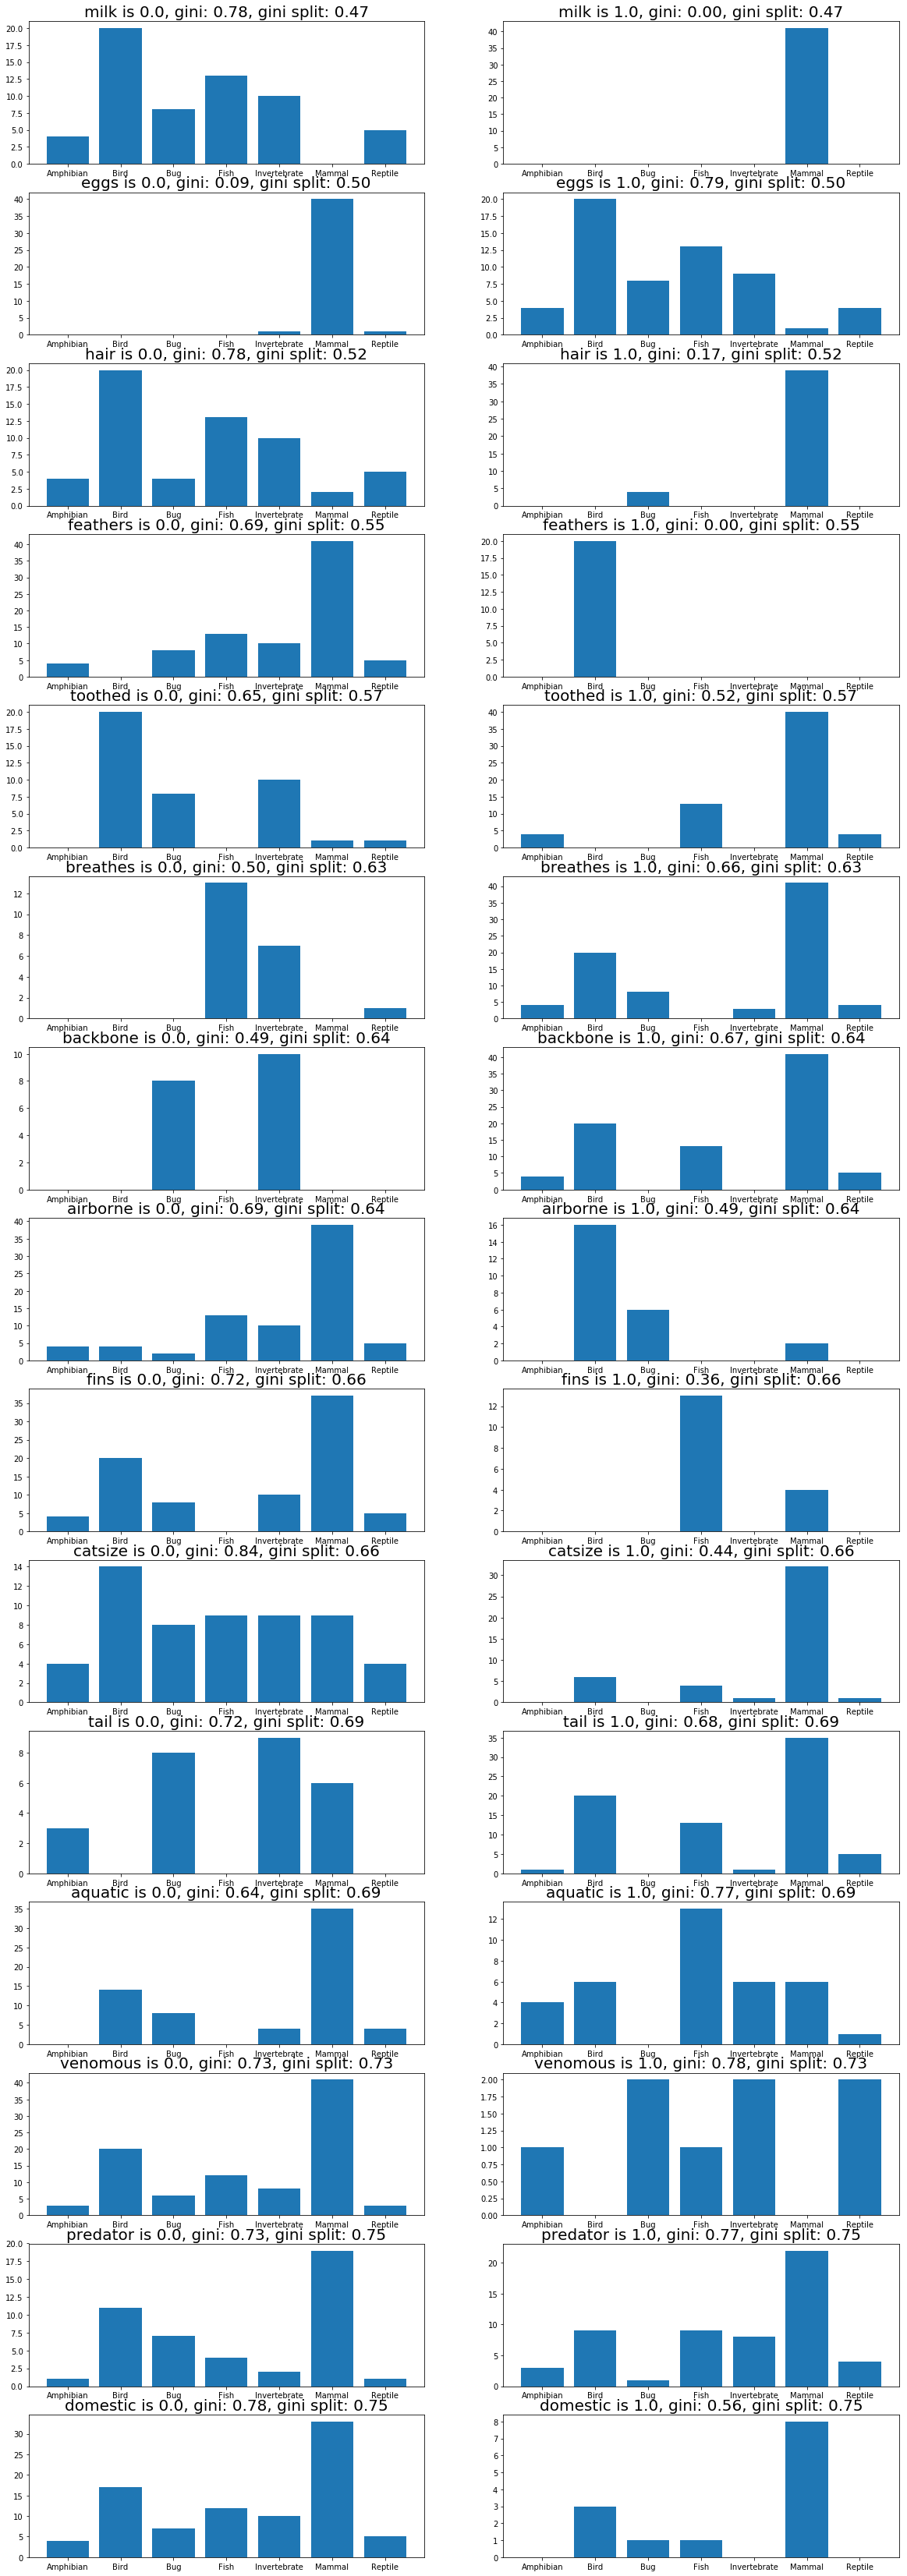

In [31]:
def make_attribute_plots(gini_split_df):

    oFig1 = plt.figure(1, figsize=(20,80))
    filename = 'node0'

    plot_index = 1
    for index, row in gini_split_df.iterrows():
        print(row['column_name'], row['gini_split'])
        new = oFig1.add_subplot(20,2, plot_index)  
        temp_class_name = row['column_name']
        print(temp_class_name)
        unique_col_value = row['column_value']
        gini_score = row['gini_score']
        gini_split = row['gini_split']
        values = row['distribution']
        new.bar(class_names, values)
        new.set_title(temp_class_name + " is " + str(unique_col_value) + ", gini: " + f'{gini_score:.2f}' + ", gini split: " + f'{gini_split:.2f}', fontsize=20)
        plot_index+=1

    oFig1.savefig("../d3/static_tree/python_plots/" + filename, pad_inches=0.4, bbox_inches="tight")
    plt.show()
    
make_attribute_plots(gini_split_df)


In [ ]:
gini_splits.index.values

In [ ]:
gini_splits.values

In [ ]:
df_class[df_class['milk']==1]['class_name'].value_counts()

In [ ]:
hist_vals = df_class['class_name'].value_counts(sort=False)
plt.bar(hist_vals.index.values, hist_vals.values)

In [ ]:
export_graphviz(dtree, out_file='zoo.dot',  
                filled=True, rounded=True,
                special_characters=True, feature_names = df.columns, class_names=list(class_only['class_name'].unique()))

In [ ]:
dot_string= dot_data.getvalue()
x = dot_string.replace("&le;", "<=") #.replace("&#35;", "->")
x = x.replace("\n", "")
x = x.replace("<br/>", ",")
x = x.replace("label=<", "")
x = x.split(";")
x = x[2:-1]

In [ ]:
import re
edge_list =[]
node_list =[]
element_regex = re.compile(r'.+->.+')
for i in x:
    if element_regex.match(i):
        edge_list.append(i)
    else:
        node_list.append(i)

In [ ]:
edge_df = pd.DataFrame(columns=['current_node', 'parent_node'])
for i in range(0, len(edge_list)):
    print(edge_list[i])
    pattern = "(\d+)"
    a = re.findall(pattern, edge_list[i])
    source = a[0]
    destination = a[1]
    edge_df = edge_df.append({'current_node': destination, 'parent_node': source}, ignore_index=True)
edge_df

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


In [ ]:
x=np.arange(10)
x.shape
np.ones(x.shape)*0.4

In [ ]:
import seaborn as sns; sns.set()
sns.palplot(sns.color_palette())
def get_node_string(orig):
    print(orig)
    
    # parse and retrieve value
    node_name = re.search('^\d+', orig).group(0)
    samples = re.search('samples = (\d+)', orig).group(1)
    gini = re.search('gini = (\d+.\d+)', orig).group(1)
    class_name = re.search('class = (\w+)', orig).group(1)
    color = re.search('fillcolor=(.+")', orig).group(1)
    value =  re.search( 'value = (.+]),', orig).group(1)
    new_value = value.replace('[', '').replace(']', '').split(",")
    
    
    #make figure:
    fig, (ax1, ax2) = plt.subplots(1,2, gridspec_kw = {'width_ratios':[1, 3]}, figsize=(4, 2))
    
    #gini plot
    ax1.set_title('gini')
    ax1.bar(0, float(gini), color='darkred')
    ax1.get_xaxis().set_visible(False)
    
    
    #class distribution plot
    ax2.set_title('class distribution')
    plot_class_names = list(class_only['class_name'])
    _X = np.arange(len(plot_class_names))
    print(new_value)
    new_new_value = [int(x) for x in new_value]
    ax2.bar(plot_class_names, new_new_value, color=sns.color_palette("Paired")[0:8])
    ax2.set_ylim(0, 45)

   
    
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)
    
    plot_name = 'plots/'+'gini' + str(node_name) + '.png'
    plt.show()
    
    temp_row = {'current_node': node_name, 'gini': gini, 'samples': samples, 'class_name': class_name, 'color': color, 'value': value, 'plot_name': plot_name}
    
    #check if gini is in the first result
    s = orig.split(',')
    pattern = 'gini'
    gini_match = re.search(pattern, s[0])
    
    if gini_match is None: 
        attribute = s[0].split("[")[1]
        temp_row['attribute']= attribute
   
        
    return (temp_row, fig)

In [ ]:
ult_df = pd.DataFrame(columns=['current_node', 'attribute', 'gini', 'samples', 'value', 'class_name', 'color', 'plot_name'])
# ult_df = df_.fillna(0) # with 0s rather than NaNs
ult_df

In [ ]:
node_list

In [ ]:
ult_list = {}
for i in range(0, len(node_list)):
    (node_string, fig) = get_node_string(node_list[i])
    ult_df = ult_df.append(node_string, ignore_index=True)
    fig.savefig('../treant-js/examples/decision-tree/' + node_string['plot_name'], pad_inches=0.4, bbox_inches="tight")

In [ ]:
ult_df

In [ ]:
new_df = ult_df.merge(edge_df, on='current_node', how='outer')
new_df
# new_df.fillna(0)

In [ ]:
make_attribute_view(df_class, 'node0')

In [ ]:
make_attribute_view(df_class[df_class['milk'] > 0.5], 'node18')

In [ ]:
make_attribute_view(df_class[df_class['milk'] <= 0.5], 'node1')

In [ ]:
full_string = ""
for index, row in new_df.iterrows():
    node_name = row['current_node']
    attribute = row['attribute']
    plot_name = row['plot_name']
    samples = row['samples']
    class_name = row['class_name']
    value = row['value']
    gini = row['gini']
    if node_name=='0':
        result = 'node'+ str(node_name) + ' = {'\
        + 'text: { gini: "gini:' + gini \
        + '", samples: "samples: ' + samples \
        + '", attribute: "attribute: ' + str(attribute) \
        + '", class_name: "class_name: ' + class_name \
        + '", value: "value: ' + value \
        + '"},'\
        + 'connectors: {type: "curve", style: {"stroke-width": ' + str(int(samples)/5) + '}},' \
        + 'image:"' + plot_name + '"},'
    else:
        parent = row['parent_node']
        result = 'node'+ str(node_name) + ' = {' + "parent: node" + str(parent) \
        + ', text: {' \
        + 'gini: "gini: ' + gini \
        + '", samples: "samples: ' + samples \
        + '", attribute: "attribute: ' + str(attribute) \
        + '", class_name: "class_name: ' + class_name \
        + '", value: "value: ' + value \
        + '"},'\
        + 'connectors: {type: "curve", style: {"stroke-width": ' + str(int(samples)/5) + '}},' \
        + 'image:"' + plot_name + '"},' 
        
        
#     print(result)
    full_string+=result
    
    
#         + 'connectors: {type: "step", style: {"stroke-width": 2}},' \


In [ ]:
first_part = 'var config = {container: "#basic-example", levelSeparation: 200, connectors: {type: "curve", style: { "stroke-width": 5}}, node: { HTMLclass: "nodeExample1"}}, '
last_part = "chart_config = [config," + ','.join(['node' + str(x) for x in list(new_df['current_node'].keys())])+'];'
whole_string = first_part + full_string + last_part
text_file = open("../treant-js/examples/decision-tree/basic-example.js", "w")
text_file.write(whole_string)
text_file.close()

In [ ]:
whole_string